## Problem Statement: I have built a model to Predict the total amount of sales (quantity) in the next 2 years for: Each Product ID

## 1. Data Exploration & Cleaning

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.1 Read dataset and check the number of rows and columns

In [194]:
retail_data = pd.read_csv('./Data/UrbanEdgeApparel.csv')
retail_data
cleaned_data = retail_data

In [195]:
print('There are ', retail_data.shape[0],'rows and',retail_data.shape[1],'columns')

There are  89644 rows and 21 columns


In [196]:
cleaned_data.shape

(89644, 21)

### 1.2 Checking duplicate rows & Removing duplicate rows

In [197]:
# Checking.. 
duplicate_rows = retail_data.duplicated()
print("There are some duplicate rows:")
print(retail_data[duplicate_rows])


# Removing..

cleaned_data.drop_duplicates(inplace=True)
duplicate_rows = cleaned_data.duplicated()
print("Duplicate Rows: Removed")
print(duplicate_rows.sum())

There are some duplicate rows:
       Order ID Order Status  Order Date Order Day of Week Order Month  \
281         445    Completed   1/23/2014          Thursday     January   
282         445    Completed   1/23/2014          Thursday     January   
395         204    Completed    8/7/2013         Wednesday      August   
396         204    Completed    8/7/2013         Wednesday      August   
664         327    Completed  10/29/2013           Tuesday     October   
...         ...          ...         ...               ...         ...   
88577     10393    Completed   6/26/2022            Sunday        June   
88672     10416    Completed   6/28/2022           Tuesday        June   
89198      9178    Completed   12/2/2021          Thursday    December   
89245      9187    Completed   12/3/2021            Friday    December   
89287      9191    Completed   12/5/2021            Sunday    December   

       Order Year Customer ID     Company ID  Product ID Product Variant ID  \
2

### 1.3 Cheching Null values

In [198]:
isnull_counts = cleaned_data.isnull().sum()
isnull_counts

Order ID                         0
Order Status                     0
Order Date                     145
Order Day of Week              145
Order Month                    145
Order Year                     145
Customer ID                      0
Company ID                    3080
Product ID                       0
Product Variant ID            3001
Product Unit Selling Price       0
Product Quantity                 0
Total Selling Price              0
Payment Status                   0
Shipment ID                      0
Shipment Number                  0
Shipping Address Type            0
Shipping City                   37
Shipping State                  89
Shipping Postal Code            37
Shipping Country                37
dtype: int64

In [199]:
print('The following features have null values:')
print(isnull_counts[isnull_counts > 0])
print('Null values in Order Day of Week, Order Month, Order Year are cascading effect of Order Date')

The following features have null values:
Order Date               145
Order Day of Week        145
Order Month              145
Order Year               145
Company ID              3080
Product Variant ID      3001
Shipping City             37
Shipping State            89
Shipping Postal Code      37
Shipping Country          37
dtype: int64
Null values in Order Day of Week, Order Month, Order Year are cascading effect of Order Date


## 1.3.1 Handling Null values in Order Date

In [200]:
null_check_data = cleaned_data[cleaned_data['Order Date'].isnull()]
null_check_data

,Order ID,Order Status,Order Date,Order Day of Week,Order Month,Order Year,Customer ID,Company ID,Product ID,Product Variant ID,...,Product Quantity,Total Selling Price,Payment Status,Shipment ID,Shipment Number,Shipping Address Type,Shipping City,Shipping State,Shipping Postal Code,Shipping Country
38098,7427,Failed,NaN,NaN,NaN,NaN,Cust_3133,NaN,Prod_6800,Prod_Var_68007,...,2,11.92,Declined,10433,10433,Residential,Jersey City,New Jersey,07304,United States
38747,7591,Failed,NaN,NaN,NaN,NaN,Cust_2705,NaN,Prod_1147,Prod_Var_11470,...,2,28.00,Declined,10684,10684,Residential,Miami,Florida,33166,United States
38748,7591,Failed,NaN,NaN,NaN,NaN,Cust_2705,NaN,Prod_1147,Prod_Var_11471,...,2,28.00,Declined,10684,10684,Residential,Miami,Florida,33166,United States
46018,8269,Failed,NaN,NaN,NaN,NaN,Cust_2493,NaN,Prod_2600,Prod_Var_26012,...,1,13.50,Declined,11222,11222,Residential,Ridgeway,Iowa,52165,United States
46100,8281,Failed,NaN,NaN,NaN,NaN,Cust_2776,NaN,Prod_2600,Prod_Var_26011,...,1,13.50,Declined,11612,11612,Residential,Cresco,Iowa,52136,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87563,10144,Failed,NaN,NaN,NaN,NaN,Cust_2156,NaN,Prod_7930,Prod_Var_79300,...,2,36.00,Declined,14060,14060,Residential,New York,New York,10016,United States
87564,10144,Failed,NaN,NaN,NaN,NaN,Cust_2156,NaN,Prod_7940,Prod_Var_79400,...,1,19.00,Declined,14060,14060,Residential,New York,New York,10016,United States
87565,10144,Failed,NaN,NaN,NaN,NaN,Cust_2156,NaN,Prod_1140,Prod_Var_11420,...,1,24.00,Declined,14060,14060,Residential,New York,New York,10016,United States
88212,10310,Failed,NaN,NaN,NaN,NaN,Cust_1124,NaN,Prod_1000,Prod_Var_10005,...,7,84.00,Declined,14294,14294,Residential,Torrance,California,90503,United States


### Checking Order Date null values based on Payment Status

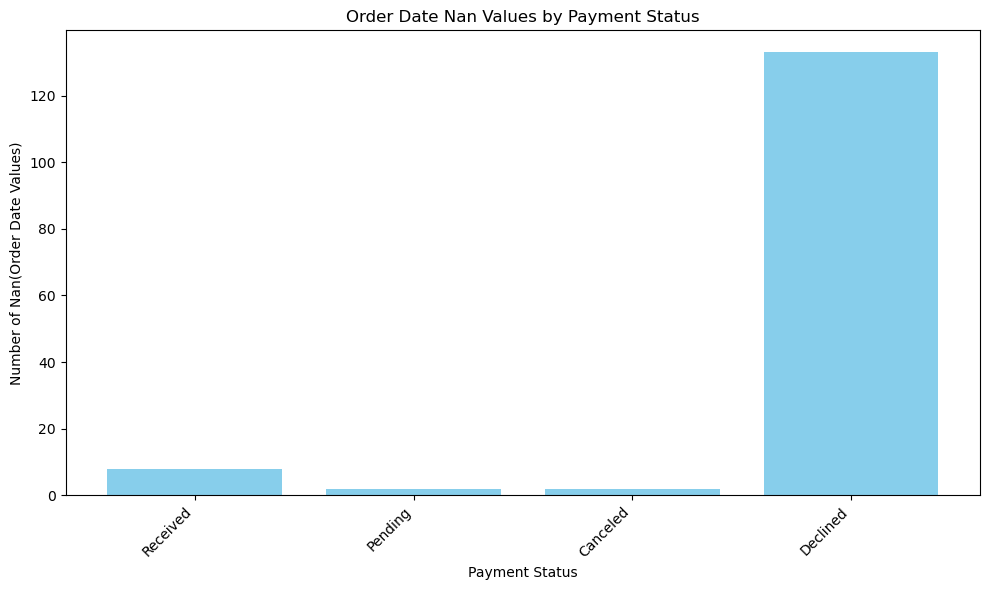

In [201]:
payment_status = cleaned_data['Payment Status'].unique()
null_order_dates = {}

for status in payment_status:
    subset = cleaned_data[cleaned_data['Payment Status'] == status]
    null_order_date_count = subset['Order Date'].isnull().sum()
    null_order_dates[status] = null_order_date_count
    
statuses = list(null_order_dates.keys())
counts = list(null_order_dates.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(statuses, counts, color='skyblue')
plt.xlabel('Payment Status')
plt.ylabel('Number of Nan(Order Date Values)')
plt.title('Order Date Nan Values by Payment Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [202]:
null_order_dates

{'Received': 8, 'Pending': 2, 'Canceled': 2, 'Declined': 133}

In [203]:
print('By looking the above dataframe & graph Payment status - Declined has more no.of null values in its corresponding Order Date.')

By looking the above dataframe & graph Payment status - Declined has more no.of null values in its corresponding Order Date.


### Filling Order Date based on next known date(Imputation-backward fill). Deleting rows will not be a good idea since it has 145 NaNs.

In [204]:
cleaned_data['Order Date'].fillna(method='bfill', inplace=True)
cleaned_data.isnull().sum()

Order ID                         0
Order Status                     0
Order Date                       0
Order Day of Week              145
Order Month                    145
Order Year                     145
Customer ID                      0
Company ID                    3080
Product ID                       0
Product Variant ID            3001
Product Unit Selling Price       0
Product Quantity                 0
Total Selling Price              0
Payment Status                   0
Shipment ID                      0
Shipment Number                  0
Shipping Address Type            0
Shipping City                   37
Shipping State                  89
Shipping Postal Code            37
Shipping Country                37
dtype: int64

## 1.3.2 Handling Null values in Order Day of Week, Order Month, Order Year

### Fill NaNs in Order Day of Week, Order Month, Order Year based on Order Date

In [205]:
cleaned_data['Order Date'] = pd.to_datetime(cleaned_data['Order Date'])

cleaned_data['Order Day of Week'].fillna(cleaned_data['Order Date'].dt.dayofweek, inplace=True)
cleaned_data['Order Month'].fillna(cleaned_data['Order Date'].dt.month.astype(str), inplace=True)
cleaned_data['Order Year'].fillna(cleaned_data['Order Date'].dt.year, inplace=True)

cleaned_data.isnull().sum()

Order ID                         0
Order Status                     0
Order Date                       0
Order Day of Week                0
Order Month                      0
Order Year                       0
Customer ID                      0
Company ID                    3080
Product ID                       0
Product Variant ID            3001
Product Unit Selling Price       0
Product Quantity                 0
Total Selling Price              0
Payment Status                   0
Shipment ID                      0
Shipment Number                  0
Shipping Address Type            0
Shipping City                   37
Shipping State                  89
Shipping Postal Code            37
Shipping Country                37
dtype: int64

## 1.3.3 Handling Null values in Product Variant ID - Drop

In [206]:
# Product Variant ID is a variant of Product ID, so handling of null value in that is of no use, so drop it.
cleaned_data.drop(columns='Product Variant ID', inplace=True)
cleaned_data.isnull().sum()

Order ID                         0
Order Status                     0
Order Date                       0
Order Day of Week                0
Order Month                      0
Order Year                       0
Customer ID                      0
Company ID                    3080
Product ID                       0
Product Unit Selling Price       0
Product Quantity                 0
Total Selling Price              0
Payment Status                   0
Shipment ID                      0
Shipment Number                  0
Shipping Address Type            0
Shipping City                   37
Shipping State                  89
Shipping Postal Code            37
Shipping Country                37
dtype: int64

In [37]:
#cleaned_data[cleaned_data['Shipping City'].isnull()]
# as of now omitting Shipping City, Shipping State,Shipping Postal Code, Shipping Country   

### 1.4 Check datatype of columns & conversion

In [207]:
print(retail_data.dtypes)

Order ID                               int64
Order Status                          object
Order Date                    datetime64[ns]
Order Day of Week                     object
Order Month                           object
Order Year                           float64
Customer ID                           object
Company ID                            object
Product ID                            object
Product Unit Selling Price           float64
Product Quantity                       int64
Total Selling Price                  float64
Payment Status                        object
Shipment ID                            int64
Shipment Number                        int64
Shipping Address Type                 object
Shipping City                         object
Shipping State                        object
Shipping Postal Code                  object
Shipping Country                      object
dtype: object


### Converting Order Year from float64 to int

In [208]:
cleaned_data['Order Year'] = cleaned_data['Order Year'].astype(int)
print(cleaned_data.dtypes)

Order ID                               int64
Order Status                          object
Order Date                    datetime64[ns]
Order Day of Week                     object
Order Month                           object
Order Year                             int64
Customer ID                           object
Company ID                            object
Product ID                            object
Product Unit Selling Price           float64
Product Quantity                       int64
Total Selling Price                  float64
Payment Status                        object
Shipment ID                            int64
Shipment Number                        int64
Shipping Address Type                 object
Shipping City                         object
Shipping State                        object
Shipping Postal Code                  object
Shipping Country                      object
dtype: object


### 1.5 Number of Years of Data

In [209]:
order_year = cleaned_data['Order Year'].unique()
print(order_year)
print('A dataset over',len(order_year),'years from 2013 to 2024')

[2013 2014 2015 2016 2017 2018 2020 2019 2021 2022 2023 2024]
A dataset over 12 years from 2013 to 2024


## 2 Feature Engineering

In [210]:
unique_products = cleaned_data['Product ID'].unique()
print('Number unique products in Urban Edge Apparel ',len(unique_products))
unique_products

Number unique products in Urban Edge Apparel  302


array(['Prod_5030', 'Prod_70018', 'Prod_1000', 'Prod_5080', 'Prod_5002',
       'Prod_2004', 'Prod_8072', 'Prod_3020', 'Prod_2025', 'Prod_1009',
       'Prod_8060', 'Prod_7700', 'Prod_8080', 'Prod_5001', 'Prod_4310',
       'Prod_4402', 'Prod_3500', 'Prod_1005', 'Prod_1017', 'Prod_1007',
       'Prod_1012', 'Prod_8110', 'Prod_8100', 'Prod_8073', 'Prod_5003',
       'Prod_1140', 'Prod_7910', 'Prod_7900', 'Prod_6800', 'Prod_9100',
       'Prod_3010', 'Prod_3030', 'Prod_3022', 'Prod_1350', 'Prod_1330',
       'Prod_1370', 'Prod_79006', 'Prod_3023', 'Prod_1143', 'Prod_2015',
       'Prod_2010', 'Prod_2012', 'Prod_5700', 'Prod_4000', 'Prod_4400',
       'Prod_7350', 'Prod_2600', 'Prod_2024', 'Prod_6400', 'Prod_4100',
       'Prod_7550', 'Prod_5004', 'Prod_6203', 'Prod_6050', 'Prod_7820',
       'Prod_1003', 'Prod_94001', 'Prod_7930', 'Prod_4401', 'Prod_4110',
       'Prod_2000', 'Prod_4800', 'Prod_5801', 'Prod_1321', 'Prod_9450',
       'Prod_9423', 'Prod_94103', 'Prod_48016', 'Prod_50062',

## Filtering only the successful sales: 'Order Status == Completed' and 'Payment Status == Received'

### There are various possibility of this inconsistency: sometimes Payment will be sucessful but Order may get canceled due to some reasons. So, considering only the successful sales for each product.

In [211]:
order_status = cleaned_data['Order Status'].unique()
print('Order Status:',order_status)

payment_status = cleaned_data['Payment Status'].unique()
print('Payment Status:',payment_status)

Order Status: ['Completed' 'Canceled' 'Process' 'Failed']
Payment Status: ['Received' 'Pending' 'Canceled' 'Declined']


In [212]:
filtered_data = cleaned_data[cleaned_data['Order Status'] == 'Completed']
filtered_data2= filtered_data[filtered_data['Payment Status'] != 'Received']
print(filtered_data2['Payment Status'].unique())


filtered_data3= cleaned_data[cleaned_data['Payment Status'] == 'Received']
filtered_data4 = filtered_data3[filtered_data3['Order Status'] != 'Completed']
print(filtered_data4['Order Status'].unique())


['Pending' 'Canceled' 'Declined']
['Canceled' 'Process']


In [213]:
filtered_data2.head()

,Order ID,Order Status,Order Date,Order Day of Week,Order Month,Order Year,Customer ID,Company ID,Product ID,Product Unit Selling Price,Product Quantity,Total Selling Price,Payment Status,Shipment ID,Shipment Number,Shipping Address Type,Shipping City,Shipping State,Shipping Postal Code,Shipping Country
514,546,Completed,2014-04-02,Wednesday,April,2014,Cust_3178,Company_89137,Prod_94003,5.0,4,20.0,Pending,1339,1339,Residential,Murrieta,California,92562,United States
515,546,Completed,2014-04-02,Wednesday,April,2014,Cust_3178,Company_89137,Prod_2000,3.5,2,7.0,Pending,1339,1339,Residential,Murrieta,California,92562,United States
516,546,Completed,2014-04-02,Wednesday,April,2014,Cust_3178,Company_89137,Prod_2000,3.5,2,7.0,Pending,1339,1339,Residential,Murrieta,California,92562,United States
517,546,Completed,2014-04-02,Wednesday,April,2014,Cust_3178,Company_89137,Prod_2024,22.0,2,44.0,Pending,1339,1339,Residential,Murrieta,California,92562,United States
518,546,Completed,2014-04-02,Wednesday,April,2014,Cust_3178,Company_89137,Prod_2024,22.0,2,44.0,Pending,1339,1339,Residential,Murrieta,California,92562,United States


In [214]:
filtered_data4.head()

,Order ID,Order Status,Order Date,Order Day of Week,Order Month,Order Year,Customer ID,Company ID,Product ID,Product Unit Selling Price,Product Quantity,Total Selling Price,Payment Status,Shipment ID,Shipment Number,Shipping Address Type,Shipping City,Shipping State,Shipping Postal Code,Shipping Country
12759,2374,Canceled,2016-11-07,Monday,November,2016,Cust_2802,Company_43754,Prod_1000,4.10,60,246.0,Received,4470,4470,Residential,Alpharetta,Georgia,30005,United States
12760,2374,Canceled,2016-11-07,Monday,November,2016,Cust_2802,Company_43754,Prod_1000,4.10,60,246.0,Received,4470,4470,Residential,Alpharetta,Georgia,30005,United States
12761,2374,Canceled,2016-11-07,Monday,November,2016,Cust_2802,Company_43754,Prod_8060,4.50,3,13.5,Received,4470,4470,Residential,Alpharetta,Georgia,30005,United States
12762,2374,Canceled,2016-11-07,Monday,November,2016,Cust_2802,Company_43754,Prod_4402,2.65,12,31.8,Received,4470,4470,Residential,Alpharetta,Georgia,30005,United States
12763,2374,Canceled,2016-11-07,Monday,November,2016,Cust_2802,Company_43754,Prod_5000,2.60,3,7.8,Received,4470,4470,Residential,Alpharetta,Georgia,30005,United States


In [215]:
cleaned_data = cleaned_data[(cleaned_data['Order Status'] == 'Completed') & (cleaned_data['Payment Status'] == 'Received')]

In [216]:
cleaned_data.isnull().sum()

Order ID                         0
Order Status                     0
Order Date                       0
Order Day of Week                0
Order Month                      0
Order Year                       0
Customer ID                      0
Company ID                    2828
Product ID                       0
Product Unit Selling Price       0
Product Quantity                 0
Total Selling Price              0
Payment Status                   0
Shipment ID                      0
Shipment Number                  0
Shipping Address Type            0
Shipping City                    9
Shipping State                  61
Shipping Postal Code             9
Shipping Country                 9
dtype: int64

## Aggregating the Product based on Month, Year

### Product Unit Selling Price and Product Quantity may vary on each date, so taking average unit selling price and quantity(int) on each month & year. Total Selling Price can be calculated from them.

In [245]:
extracted_df = cleaned_data.groupby(['Product ID', 'Order Month', 'Order Year']).agg({
    'Product Unit Selling Price': 'mean',
    'Product Quantity': 'mean',
}).reset_index()

In [246]:
extracted_df['Product Quantity'] = extracted_df['Product Quantity'].astype(int)
extracted_df['Total Selling Price'] = extracted_df['Product Quantity'] * extracted_df['Product Unit Selling Price']
extracted_df

,Product ID,Order Month,Order Year,Product Unit Selling Price,Product Quantity,Total Selling Price
0,Prod_100,September,2015,0.00,5,0.00
1,Prod_1000,April,2013,3.95,13,51.35
2,Prod_1000,April,2014,3.95,8,31.60
3,Prod_1000,April,2015,4.10,16,65.60
4,Prod_1000,April,2016,4.10,20,82.00
...,...,...,...,...,...,...
11773,Prod_99300,November,2020,15.75,2,31.50
11774,Prod_99300,November,2021,29.00,1,29.00
11775,Prod_99300,October,2017,24.00,2,48.00
11776,Prod_99300,September,2017,24.00,4,96.00


In [247]:
extracted_df.isnull().sum()

Product ID                    0
Order Month                   0
Order Year                    0
Product Unit Selling Price    0
Product Quantity              0
Total Selling Price           0
dtype: int64

In [248]:
extracted_df['Order Month'].unique()

array(['September', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October'],
      dtype=object)

            Product ID  Product Quantity
Order Year                              
2013         Prod_5030               126
2014         Prod_1140               253
2015        Prod_10150               600
2016         Prod_8090               340
2017         Prod_1009               303
2018         Prod_8090               179
2019        Prod_10150               254
2020         Prod_1009               381
2021         Prod_6053               200
2022        Prod_10150               152
2023         Prod_3022               276
2024         Prod_3022               207


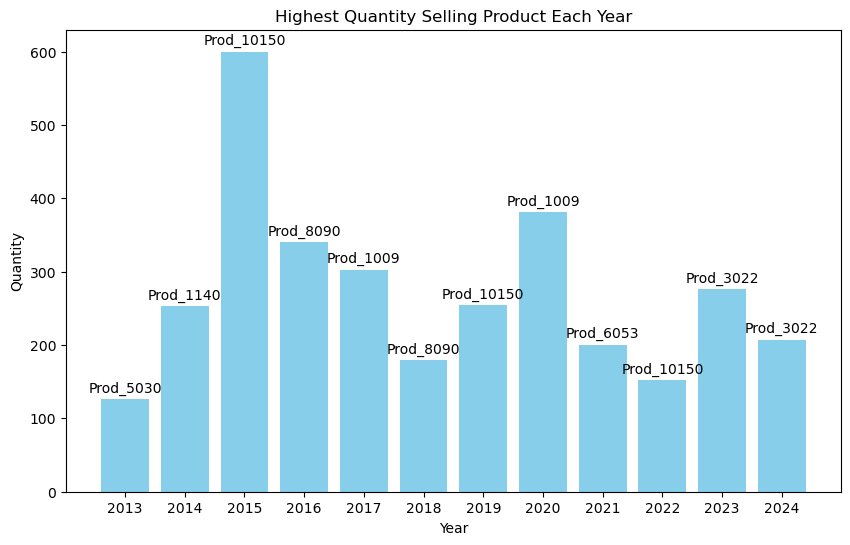

In [249]:
highest_quantity_sold_products = extracted_df.groupby('Order Year').apply(lambda x: x.loc[x['Product Quantity'].idxmax()])
print(highest_quantity_sold_products[['Product ID','Product Quantity']])
# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(highest_quantity_sold_products['Order Year'], highest_quantity_sold_products['Product Quantity'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Highest Quantity Selling Product Each Year')
plt.xticks(highest_quantity_sold_products['Order Year'])
for i, row in highest_quantity_sold_products.iterrows():
    plt.text(row['Order Year'], row['Product Quantity'] + 10, f'{row["Product ID"]}', ha='center')
plt.show()

### Looking for the Linear relationship between Product Unit Selling Price and Product Quantity for a particular product

In [250]:
# example Prod_1009
extracted_df_Prod_1009 = extracted_df[extracted_df['Product ID'] == 'Prod_1009']

#correlation_coefficient = data['Product Unit Selling Price'].corr(data['Product Quantity'])
extracted_df_Prod_1009

,Product ID,Order Month,Order Year,Product Unit Selling Price,Product Quantity,Total Selling Price
514,Prod_1009,April,2013,3.000000,19,57.000000
515,Prod_1009,April,2014,3.000000,21,63.000000
516,Prod_1009,April,2015,3.000000,295,885.000000
517,Prod_1009,April,2016,3.000000,30,90.000000
518,Prod_1009,April,2017,3.000000,120,360.000000
...,...,...,...,...,...,...
640,Prod_1009,September,2019,3.000000,38,114.000000
641,Prod_1009,September,2020,4.153125,13,53.990625
642,Prod_1009,September,2021,3.398837,50,169.941860
643,Prod_1009,September,2022,3.625714,83,300.934286


In [251]:
extracted_df_Prod_year = extracted_df_Prod_1009[extracted_df_Prod_1009['Order Year'] == 2017]
extracted_df_Prod_year

,Product ID,Order Month,Order Year,Product Unit Selling Price,Product Quantity,Total Selling Price
518,Prod_1009,April,2017,3.0,120,360.0
529,Prod_1009,August,2017,3.0,30,90.0
540,Prod_1009,December,2017,3.0,79,237.0
550,Prod_1009,February,2017,3.0,115,345.0
561,Prod_1009,January,2017,3.0,214,642.0
572,Prod_1009,July,2017,3.0,64,192.0
583,Prod_1009,June,2017,3.0,303,909.0
593,Prod_1009,March,2017,3.0,158,474.0
605,Prod_1009,May,2017,3.0,152,456.0
617,Prod_1009,November,2017,3.0,85,255.0


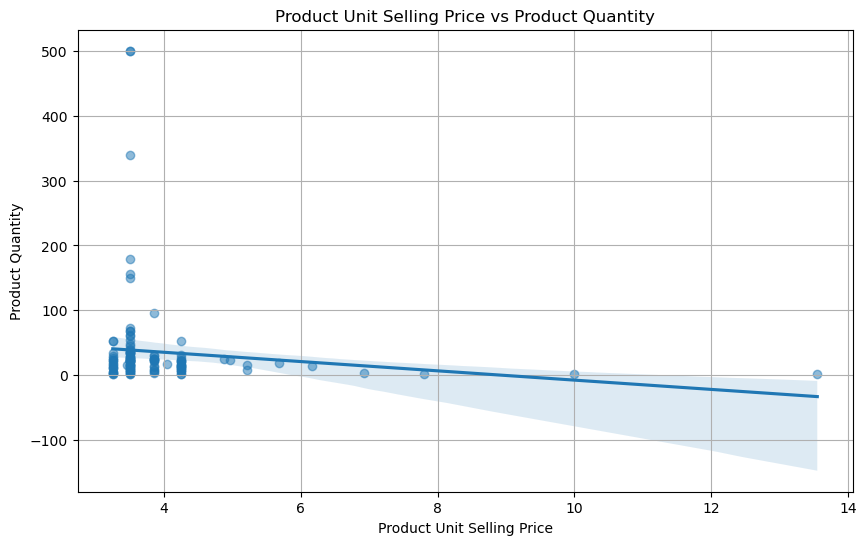

In [252]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Product Unit Selling Price', y='Product Quantity', data=extracted_df_Prod_8090, scatter_kws={'alpha':0.5})
plt.title('Product Unit Selling Price vs Product Quantity')
plt.xlabel('Product Unit Selling Price')
plt.ylabel('Product Quantity')
plt.grid(True)
plt.show()

In [253]:
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
extracted_df['Order Month'] = extracted_df['Order Month'].map(month_mapping)
extracted_df

,Product ID,Order Month,Order Year,Product Unit Selling Price,Product Quantity,Total Selling Price
0,Prod_100,9,2015,0.00,5,0.00
1,Prod_1000,4,2013,3.95,13,51.35
2,Prod_1000,4,2014,3.95,8,31.60
3,Prod_1000,4,2015,4.10,16,65.60
4,Prod_1000,4,2016,4.10,20,82.00
...,...,...,...,...,...,...
11773,Prod_99300,11,2020,15.75,2,31.50
11774,Prod_99300,11,2021,29.00,1,29.00
11775,Prod_99300,10,2017,24.00,2,48.00
11776,Prod_99300,9,2017,24.00,4,96.00


In [254]:
extracted_df.isnull().sum()

Product ID                    0
Order Month                   0
Order Year                    0
Product Unit Selling Price    0
Product Quantity              0
Total Selling Price           0
dtype: int64

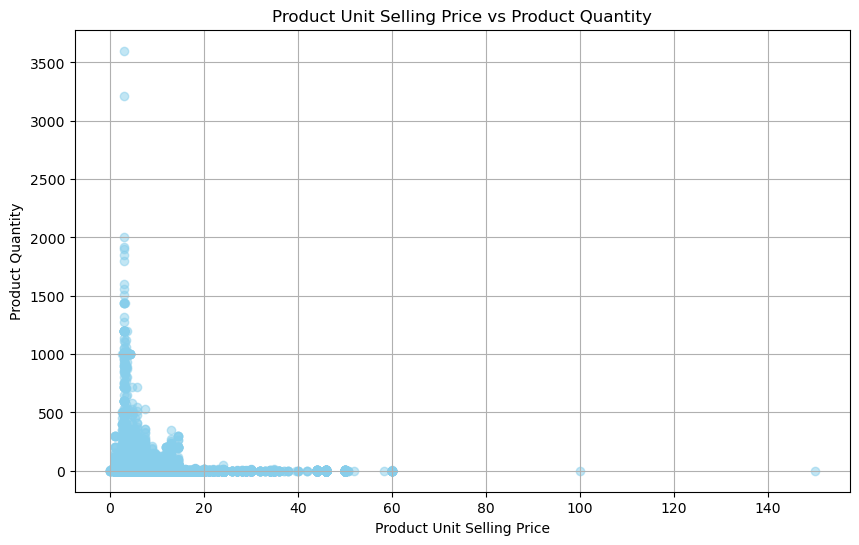

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['Product Unit Selling Price'], cleaned_data['Product Quantity'], color='skyblue', alpha=0.5)
plt.xlabel('Product Unit Selling Price')
plt.ylabel('Product Quantity')
plt.title('Product Unit Selling Price vs Product Quantity')
plt.grid(True)
plt.show()